In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import nibabel
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.plotting import find_xyz_cut_coords
from glob import glob
from scipy.stats.stats import pearsonr
from nilearn.image import mean_img

In [7]:
db= pd.read_csv("../data/database.csv")
db.head()

Unnamed: 0                     stim  \
0           0  left-right_button_press   
1           1  left-right_button_press   
2           2  left-right_button_press   
3           3  left-right_button_press   
4           4  left-right_button_press   

                                                path  subject            task  
0  /storage/store/data/ibc/smooth_derivatives/sub...        1  archi_standard  
1  /storage/store/data/ibc/smooth_derivatives/sub...        2  archi_standard  
2  /storage/store/data/ibc/smooth_derivatives/sub...        4  archi_standard  
3  /storage/store/data/ibc/smooth_derivatives/sub...        5  archi_standard  
4  /storage/store/data/ibc/smooth_derivatives/sub...        6  archi_standard

In [8]:
mask_path = "/storage/store/data/ibc/derivatives/group/gm_mask.nii.gz"
masker_3d = NiftiMasker(
        mask_img=mask_path
        ).fit()

In [16]:
def extract_original_path(db, subject, stim):
    subjects_list = [ 1,  2,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14]
    i_subject = subjects_list[int(subject)]
    db_subject = db[db["subject"] == i_subject]
    original_path = db_subject[db_subject["stim"] == stim]["path"].values[0]
    return original_path
    
def extract_info(path):
    p = path.split("ibc")[1]
    subject = p.split("subject")[1].split("_stim")[0]
    stim = p.split("_stim_")[1].split("__")[0]
    task = p.split("__")[1].split("_exp")[0]
    algo = p.split("algo")[1].split("subject")[0]
    name = p.split("_algo")[0]
    
    return name, subject, stim, task, algo 

print extract_info("/storage/workspace/hrichard/results/exp12/ibcpredict_algohyperalignmentsubject6_stim_left-right_button_press__archi_standard_exp12.nii")
print extract_original_path(db, "6", "left-right_button_press")

('predict', '6', 'left-right_button_press', 'archi_standard', 'hyperalignment')
/storage/store/data/ibc/smooth_derivatives/sub-08/ses-01/res_stats_archi_standard_ffx/stat_maps/left-right_button_press.nii.gz


In [18]:
def sort(s_list, info_id=[0, 1, 2, 3, 4]):
    name_list = []
    for s in s_list:
        info = extract_info(s)
        info_list = [info[int(i)] for i in info_id]
        name_list.append("_".join(info_list))
    return np.array(s_list)[np.argsort(name_list)]

# name, subject, stim, task, algo 

nb_subject = 0
algo_prec= ""
sort(glob("/storage/workspace/hrichard/results/exp15/ibcpredict*subject*"), info_id=[0, 2, 3, 4, 1])

array([ '/storage/workspace/hrichard/results/exp15/ibcpredict_algomeansubject0_stim_2back-0back__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algosrm_orthosubject0_stim_2back-0back__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algomeansubject0_stim_body-avg__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algosrm_orthosubject0_stim_body-avg__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algomeansubject0_stim_complex-simple__language_nsp_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algosrm_orthosubject0_stim_complex-simple__language_nsp_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algohyperalignmentsubject0_stim_computation-sentences__archi_standard_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/ibcpredict_algomeansubject0_stim_computation-sentences__archi_standard_exp15.nii',
      

('predict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'hyperalignment')
(0.076640592443618774, 0.0)
('predict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'mean')
(0.39556170578383998, 0.0)
('predict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'srm_ortho')
(0.082487042840642927, 0.0)


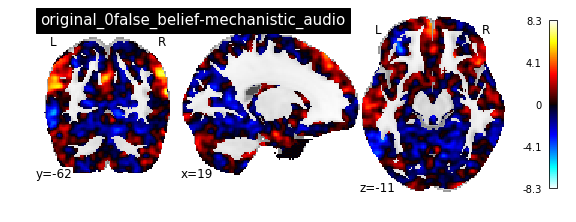

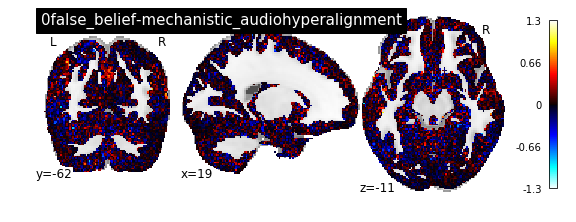

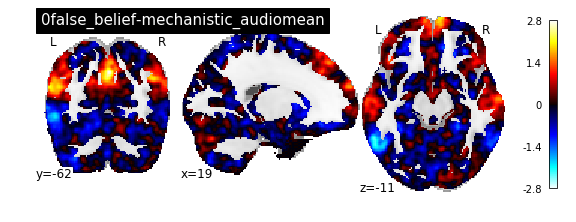

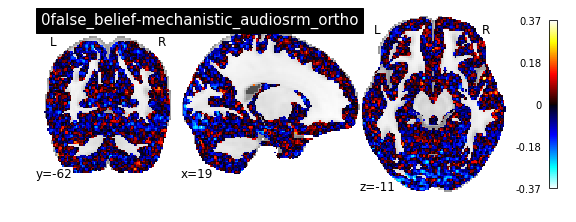

In [20]:
seen = set()
for path in sort(glob("/storage/workspace/hrichard/results/exp15/ibcpredict*algo*subject[0]_*false_belief-mechanistic_audio*")):
    info = extract_info(path)
    print(info)
    name = "_".join(info)
    original_path = extract_original_path(db, info[1], info[2])
    if info[1] + info[2] not in seen:
        seen.add(info[1] + info[2])
        original_X = masker_3d.transform(original_path)
        original_img = masker_3d.inverse_transform(original_X)
        cut_xyz = find_xyz_cut_coords(original_img)
        plotting.plot_stat_map(original_img,
            cut_coords=cut_xyz,
            title = "original_" + info[1] + info[2],
            draw_cross=False
            )
        
    X = masker_3d.transform(path)
    img = masker_3d.inverse_transform(X)
    
    print(pearsonr(original_X.flatten(), X.flatten()))
    
    plotting.plot_stat_map(
    img,
    cut_coords=cut_xyz,
    title =info[1] + info[2] + info[-1],
    draw_cross=False
    )

In [7]:
def correlation(X, Y):
    norm_X = np.linalg.norm(X)
    norm_Y = np.linalg.norm(Y)
    return X/norm_X * Y/norm_Y
    

('ibcpredict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'RRR_25_003')
(0.17812903032871447, 0.0)
('ibcpredict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'hyperalignment')
(0.16669608540778574, 0.0)
('ibcpredict', '0', 'false_belief-mechanistic_audio', 'archi_social', 'mean')
(0.3902862267333892, 0.0)
('ibcpredict', '1', 'false_belief-mechanistic_audio', 'archi_social', 'RRR_25_003')
(-0.1453833790543301, 0.0)
('ibcpredict', '1', 'false_belief-mechanistic_audio', 'archi_social', 'hyperalignment')
(-0.12526737321827972, 0.0)
('ibcpredict', '1', 'false_belief-mechanistic_audio', 'archi_social', 'mean')
(-0.15195827837957918, 0.0)
('ibcpredict', '2', 'false_belief-mechanistic_audio', 'archi_social', 'RRR_25_003')
(0.17503237932222671, 0.0)
('ibcpredict', '2', 'false_belief-mechanistic_audio', 'archi_social', 'hyperalignment')
(0.17824692533071052, 0.0)
('ibcpredict', '2', 'false_belief-mechanistic_audio', 'archi_social', 'mean')
(0.3754823617874245, 0.0)


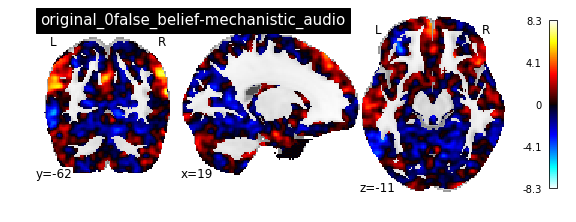

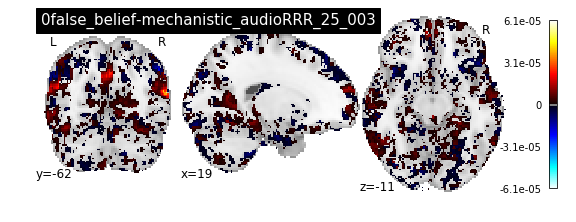

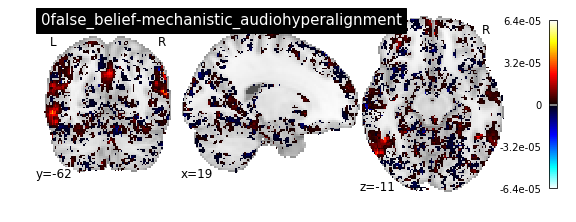

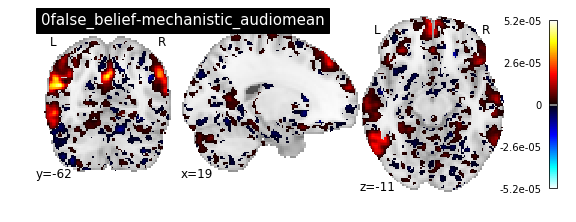

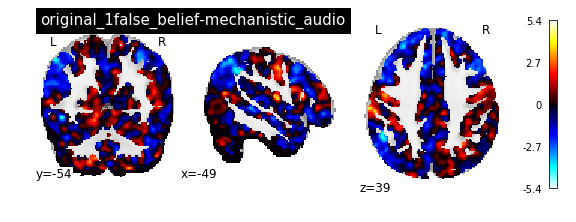

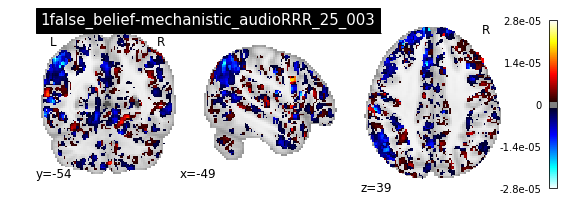

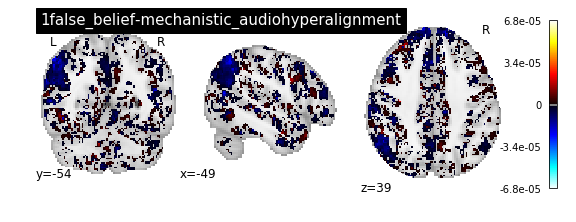

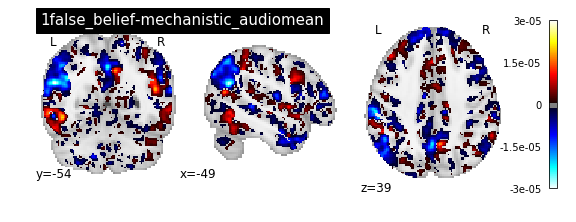

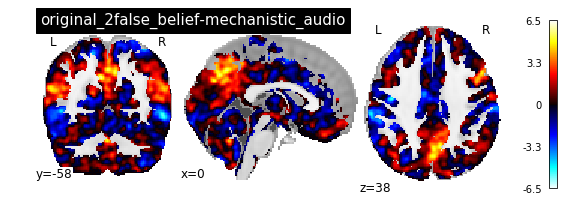

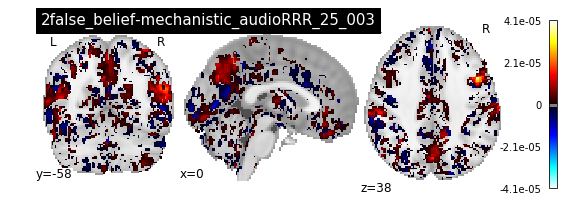

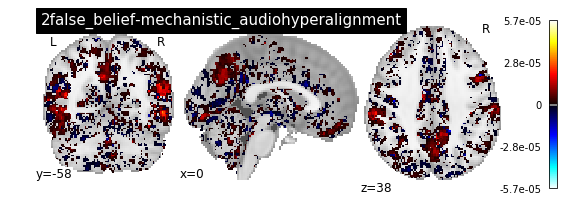

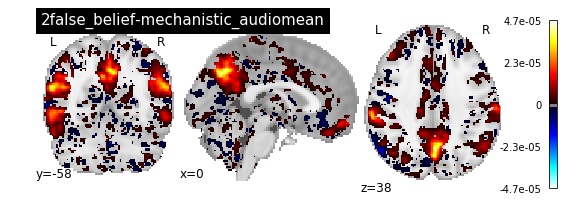

In [8]:
seen = set()
for path in sort(glob("/storage/workspace/hrichard/results/exp12/ibcpredict*algo[mRh][eyR]*subject[012]_*false_belief-mechanistic_audio*")):
    info = extract_info(path)
    print(info)
    name = "_".join(info)
    original_path = extract_original_path(db, info[1], info[2])
    if info[1] + info[2] not in seen:
        seen.add(info[1] + info[2])
        original_X = masker_3d.transform(original_path)
        original_img = masker_3d.inverse_transform(original_X)
        cut_xyz = find_xyz_cut_coords(original_img)
        plotting.plot_stat_map(original_img,
            cut_coords=cut_xyz,
            title = "original_" + info[1] + info[2],
            draw_cross=False
            )
        
    X = masker_3d.transform(path)
    img = masker_3d.inverse_transform(correlation(X, original_X))
    
    print(pearsonr(original_X.flatten(), X.flatten()))
    
    plotting.plot_stat_map(
    img,
    cut_coords=cut_xyz,
    title =info[1] + info[2] + info[-1],
    draw_cross=False
    )
    

In [9]:
corr_coef = {}
paths = sort(glob("/storage/workspace/hrichard/results/exp12/ibcpredict*subject[012]_*"), info_id = [0, 2, 3, 4, 1])

i=0
name, subject, stim, task, algo  = extract_info(paths[0])
seen = algo
temp_list = []
res_list = []
for path in paths:
    i+=1
    img = nibabel.load(path)
    X = img.get_data()
    name, subject, stim, task, algo  = extract_info(path)
    original_path = extract_original_path(db, subject, stim)
    original_X = masker_3d.inverse_transform(masker_3d.transform(original_path)).get_data()
    
    if algo != seen: 
        print(prec_stim + ": " + seen + ": " + str(np.array(temp_list).mean()) + " - n_exp: " + str(len(temp_list)))
        res_list.append((prec_stim, seen, np.array(temp_list).mean()))
        temp_list = [pearsonr(original_X.flatten(), X.flatten())[0]]
        seen = algo
    else:
        temp_list.append(pearsonr(original_X.flatten(), X.flatten())[0])
    
    prec_stim = stim + "__" + task

2back-0back__hcp_wm: RH_1e5: 0.12394502699 - n_exp: 3
2back-0back__hcp_wm: RH_1e6: 0.139079279235 - n_exp: 3
2back-0back__hcp_wm: RRR_25_003: 0.138584528023 - n_exp: 3
2back-0back__hcp_wm: hyperalignment: 0.128615976959 - n_exp: 3
2back-0back__hcp_wm: mean: 0.119415587679 - n_exp: 3
2back-0back__hcp_wm: ridgeCV_1500_2000_2500: 0.117525019292 - n_exp: 3
body-avg__hcp_wm: RH_1e5: 0.18284033992 - n_exp: 3
body-avg__hcp_wm: RH_1e6: 0.165422365852 - n_exp: 3
body-avg__hcp_wm: RRR_25_003: 0.212052391398 - n_exp: 3
body-avg__hcp_wm: hyperalignment: 0.19676861991 - n_exp: 3
body-avg__hcp_wm: mean: 0.16867851407 - n_exp: 3
body-avg__hcp_wm: ridgeCV_1500_2000_2500: 0.19674311025 - n_exp: 3
complex-simple__language_nsp: RH_1e5: -0.0796525069619 - n_exp: 3
complex-simple__language_nsp: RH_1e6: -0.0749343097551 - n_exp: 3
complex-simple__language_nsp: RRR_25_003: -0.0219824293263 - n_exp: 3
complex-simple__language_nsp: hyperalignment: -0.00833530257597 - n_exp: 3
complex-simple__language_nsp: mean

left_foot-avg__hcp_motor: ridgeCV_1500_2000_2500: 0.0360152448122 - n_exp: 3
left_hand-avg__hcp_motor: RH_1e5: 0.133955590959 - n_exp: 3
left_hand-avg__hcp_motor: RH_1e6: 0.116909858245 - n_exp: 3
left_hand-avg__hcp_motor: RRR_25_003: 0.0555578306003 - n_exp: 3
left_hand-avg__hcp_motor: hyperalignment: 0.158140854572 - n_exp: 3
left_hand-avg__hcp_motor: mean: 0.40010205389 - n_exp: 3
left_hand-avg__hcp_motor: ridgeCV_1500_2000_2500: 0.0420424110399 - n_exp: 3
match__hcp_relational: RH_1e5: 0.242912832235 - n_exp: 3
match__hcp_relational: RH_1e6: 0.32194502726 - n_exp: 3
match__hcp_relational: RRR_25_003: 0.386013489265 - n_exp: 3
match__hcp_relational: hyperalignment: 0.402725027573 - n_exp: 3
match__hcp_relational: mean: 0.455883469664 - n_exp: 3
match__hcp_relational: ridgeCV_1500_2000_2500: 0.362835976371 - n_exp: 3
math__hcp_language: RH_1e5: 0.101974063668 - n_exp: 3
math__hcp_language: RH_1e6: 0.0995114785155 - n_exp: 3
math__hcp_language: RRR_25_003: 0.103923561993 - n_exp: 3
ma

rotation_side__archi_spatial: ridgeCV_1500_2000_2500: 0.460291445169 - n_exp: 3
saccades__archi_spatial: RH_1e5: 0.273275775141 - n_exp: 3
saccades__archi_spatial: RH_1e6: 0.355548597771 - n_exp: 3
saccades__archi_spatial: RRR_25_003: 0.385674801423 - n_exp: 3
saccades__archi_spatial: hyperalignment: 0.399209324881 - n_exp: 3
saccades__archi_spatial: mean: 0.461068286892 - n_exp: 3
saccades__archi_spatial: ridgeCV_1500_2000_2500: 0.361480968402 - n_exp: 3
sentence-jabberwocky__language_nsp: RH_1e5: 0.283893071965 - n_exp: 3
sentence-jabberwocky__language_nsp: RH_1e6: 0.309769944236 - n_exp: 3
sentence-jabberwocky__language_nsp: RRR_25_003: 0.227006160545 - n_exp: 3
sentence-jabberwocky__language_nsp: hyperalignment: 0.276008070669 - n_exp: 3
sentence-jabberwocky__language_nsp: mean: 0.440859996945 - n_exp: 3
sentence-jabberwocky__language_nsp: ridgeCV_1500_2000_2500: 0.202279953189 - n_exp: 3
sentence-word__language_nsp: RH_1e5: 0.190710218859 - n_exp: 3
sentence-word__language_nsp: RH

In [10]:
res_list.append((prec_stim, seen, np.array(temp_list).mean()))

In [11]:
res_dict = {}
for res in res_list:
    if type(res) != np.float64:
        stim, algo, score = res
        if algo in res_dict:
            res_dict[algo].append(score)
        else:
            res_dict[algo] = []

In [12]:
values = []
for algo, list_algo in res_dict.items():
    print(algo, np.array(list_algo).mean())
    values.append(np.array(list_algo).mean())

values

('ridgeCV_1500_2000_2500', 0.20126077898556272)
('RH_1e6', 0.20300245923907034)
('RH_1e5', 0.17897891343098496)
('hyperalignment', 0.24418868121357296)
('RRR_25_003', 0.21893566097844677)
('mean', 0.33786589456156613)


[0.20126077898556272,
 0.20300245923907034,
 0.17897891343098496,
 0.24418868121357296,
 0.21893566097844677,
 0.33786589456156613]

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


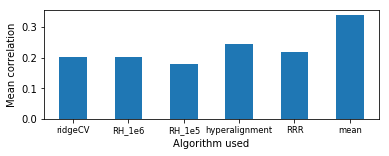

In [13]:
import matplotlib.pyplot as plt
names = ["ridgeCV", "RH_1e6", "RH_1e5", "hyperalignment", "RRR", "mean"]
plt.figure(figsize=(6,2))
plt.bar(np.array(range(len(values)))*1000, values, width=500, align='center')
plt.xticks(np.array(range(len(values)))*1000, names, size='small')
plt.ylabel("Mean correlation")
plt.xlabel("Algorithm used")
plt.legend()

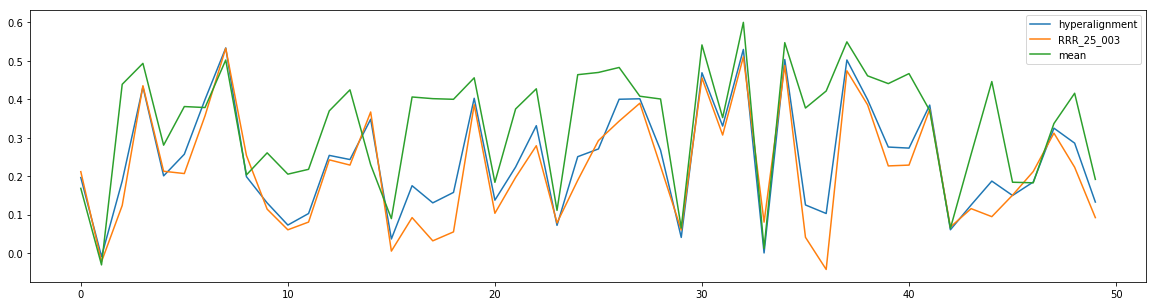

In [14]:
plt.figure(figsize=(20,5))
for algo, list_score in res_dict.items():
    if algo in ['hyperalignment', 'RRR_25_003', 'mean']:
        plt.plot(list_score, label=algo)
plt.legend()